In [1]:
import sqlite3 as sq
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

db_path="C:\\xx\\xx\\xx\\xx\\home_sales.db"

conn=sq.connect(db_path)

In [2]:

df = pd.read_sql_query("select * from sales", conn)

df.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [3]:
print(df.describe())

print(df.info())

print(df.shape)

                 id         price      bedrooms     bathrooms        floors  \
count  2.187100e+04  2.189600e+04  21905.000000  21938.000000  21862.000000   
mean   7.393268e+06  5.406538e+05      3.368820      2.112339      1.494397   
std    3.897312e+05  3.694047e+05      0.908358      0.769817      0.540461   
min    6.721618e+06  7.500000e+04      0.000000      0.000000      1.000000   
25%    7.055892e+06  3.210000e+05      3.000000      1.500000      1.000000   
50%    7.389071e+06  4.500000e+05      3.000000      2.250000      1.500000   
75%    7.728466e+06  6.450000e+05      4.000000      2.500000      2.000000   
max    8.071385e+06  7.700000e+06     11.000000      8.000000      3.500000   

         waterfront          view  review_score  basement_size         built  \
count  21871.000000  21908.000000  21851.000000   21929.000000  21853.000000   
mean       0.007910      0.231833      7.655439     291.298053   1970.976571   
std        0.088588      0.763716      1.175198 

In [4]:
[print(col,"\n",df[col].value_counts()) for col in df.columns]

"""
By doing a value count of each column, some initial observations:
1) there are duplicate transaction ids, such as ( 7259748, 7964035, 6737999) which appear multiple times
2) dates will require some cleaning , values such as '11 Auust 2014' appear
3) 7 or more bedroom units are quite rare, might want to group them together, might appear as outliers 
4) Number of bathrooms - have decimal places, consider to drop this column
5) number of floors - seem a bit on the low side, ranging from 1 to 3.5, does .5 represent attic?
6) waterfront - class imbalance with only 7.97% of records facing the waterfront
7) view - majority of the records have a score of 0
8) condition - needs stripping and standardization of text
9) review score - need to check for correlation with view(internal)
10) living room size- check for correlation with size and no of bedrooms
"""

id 
 7259748.0    3
7964035.0    3
6737999.0    3
8031599.0    3
7202107.0    3
            ..
6988925.0    1
7775383.0    1
8037532.0    1
7251110.0    1
7054800.0    1
Name: id, Length: 20343, dtype: int64
date 
 23 June 2014        143
25 March 2015       132
08 July 2014        131
27 April 2015       129
25 June 2014        127
                   ... 
08 March 2015         1
14 Mrch 2015          1
22 ay 2014            1
30 Sptember 2014      1
11 ay 2015            1
Name: date, Length: 488, dtype: int64
price 
 450000.0     170
350000.0     169
425000.0     156
325000.0     155
550000.0     155
            ... 
969000.0       1
386180.0       1
1034500.0      1
608500.0       1
884744.0       1
Name: price, Length: 3912, dtype: int64
bedrooms 
 3.0     9965
4.0     6969
2.0     2800
5.0     1620
6.0      272
1.0      203
7.0       41
8.0       13
0.0       12
9.0        5
10.0       3
11.0       2
Name: bedrooms, dtype: int64
bathrooms 
 2.50    5427
1.00    3930
1.75    3086
2

"\nBy doing a value count of each column, some initial observations:\n1) there are duplicate transaction ids, such as ( 7259748, 7964035, 6737999) which appear multiple times\n2) dates will require some cleaning , values such as '11 Auust 2014' appear\n3) 7 or more bedroom units are quite rare, might want to group them together, might appear as outliers \n4) Number of bathrooms - have decimal places, consider to drop this column\n5) number of floors - seem a bit on the low side, ranging from 1 to 3.5, does .5 represent attic?\n6) waterfront - class imbalance with only 7.97% of records facing the waterfront\n7) view - majority of the records have a score of 0\n8) condition - needs stripping and standardization of text\n9) review score - need to check for correlation with view(internal)\n10) living room size- check for correlation with size and no of bedrooms\n"

In [5]:
print(df.columns)

date_list=['date']

int_list =['bedrooms', 'floors','waterfront','view','review_score', 'basement_size','built','renovation','zipcode']

float_list=['price','bathrooms','latitude', 'longitude','living_room_size','lot_size']

str_list=['id','condition']

"""
@notes:
1. Bathroom - Should be int but planning to drop the column

"""

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'review_score', 'basement_size', 'built',
       'renovation', 'zipcode', 'latitude', 'longitude', 'living_room_size',
       'lot_size'],
      dtype='object')


'\n@notes:\n1. Bathroom - Should be int but planning to drop the column\n\n'

In [6]:
df1=df.copy(deep=True) # Keep a copy of the original as a backup

In [7]:
def  findna(df, column):
    return print(column," : ",str(df[column].isna().sum())," : Percentage : ",str(df[column].isna().sum()/df[column].count()) )

[ findna(df1, col) for col in df1.columns]

id  :  1283  : Percentage :  0.05866215536555256
date  :  1229  : Percentage :  0.05605473204104903
price  :  1258  : Percentage :  0.05745341614906832
bedrooms  :  1249  : Percentage :  0.057018945446245146
bathrooms  :  1216  : Percentage :  0.05542893609262467
floors  :  1292  : Percentage :  0.05909797822706065
waterfront  :  1283  : Percentage :  0.05866215536555256
view  :  1246  : Percentage :  0.056874201205039256
condition  :  1264  : Percentage :  0.057743261763362266
review_score  :  1303  : Percentage :  0.05963113816301313
basement_size  :  1225  : Percentage :  0.0558621004149756
built  :  1301  : Percentage :  0.05953416006955567
renovation  :  1257  : Percentage :  0.057405123989587616
zipcode  :  1270  : Percentage :  0.05803326631328825
latitude  :  1251  : Percentage :  0.05711546363511848
longitude  :  1271  : Percentage :  0.058081615866197506
living_room_size  :  1242  : Percentage :  0.056681270536692224
lot_size  :  1222  : Percentage :  0.05571767280685756


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
"""
Checking duplicate transaction ids, such as ( 7259748, 7964035, 6737999) which appear multiple times

It appears that there are repeat records because they have multiple conditions and review_scores for the same property.
"""

df1[df1["id"].isin([7259748, 7964035, 6737999]) ].drop_duplicates().sort_values(by="id")

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
8346,6737999.0,08 November 2014,325000.0,3.0,1.5,2.0,0.0,0.0,fair,6.0,0.0,1998.0,0.0,98144.0,47.5873,-122.299,1310.0,2997.0
22222,6737999.0,08 November 2014,325000.0,3.0,1.5,2.0,0.0,0.0,fair,9.0,0.0,1998.0,0.0,98144.0,47.5873,-122.299,1310.0,2997.0
22823,6737999.0,08 November 2014,325000.0,3.0,1.5,2.0,0.0,0.0,fair,8.0,0.0,1998.0,0.0,98144.0,47.5873,-122.299,1310.0,2997.0
324,7259748.0,05 September 2014,232000.0,2.0,1.0,1.0,0.0,0.0,fair,8.0,280.0,1922.0,1984.0,98146.0,47.4957,-122.352,1820.0,7460.0
325,7259748.0,11 March 2015,240500.0,2.0,1.0,1.0,0.0,0.0,FAIR,7.0,280.0,1922.0,1984.0,98146.0,47.4957,-122.352,1820.0,7460.0
23109,7259748.0,11 March 2015,240500.0,2.0,1.0,1.0,0.0,0.0,fair,7.0,280.0,1922.0,1984.0,98146.0,47.4957,-122.352,1820.0,7460.0
7890,7964035.0,12 May 2014,185000.0,3.0,1.5,1.0,0.0,0.0,good,8.0,0.0,1961.0,0.0,98092.0,47.2874,-122.192,1710.0,8800.0
22357,7964035.0,12 May 2014,185000.0,3.0,1.5,1.0,0.0,0.0,good,7.0,0.0,1961.0,0.0,98092.0,47.2874,-122.192,1710.0,8800.0


In [9]:
"""
Cleaning up condition column by lower casing and trimming extra spaces.
"""
df1["condition"]=df1["condition"].str.lower().str.strip()

df1["condition"].value_counts()

fair         14211
good          5757
excellent     1716
poor           174
terrible        32
Name: condition, dtype: int64

In [10]:
avg_duplicate_score=df1[df1["id"].isin([7259748, 7964035, 6737999]) ].drop_duplicates()[["id","review_score"]].groupby("id").mean().reset_index()

avg_duplicate_score

,id,review_score
0,6737999.0,7.666667
1,7259748.0,7.500000
2,7964035.0,7.500000


In [11]:
 for row in avg_duplicate_score.iterrows():
        df1.loc[df1['id']==row[1][0],'review_score']=row[1][1]
     

In [12]:
df1[df1["id"].isin([7259748, 7964035, 6737999]) ].drop_duplicates().sort_values(by="id")

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
8346,6737999.0,08 November 2014,325000.0,3.0,1.5,2.0,0.0,0.0,fair,7.666667,0.0,1998.0,0.0,98144.0,47.5873,-122.299,1310.0,2997.0
324,7259748.0,05 September 2014,232000.0,2.0,1.0,1.0,0.0,0.0,fair,7.500000,280.0,1922.0,1984.0,98146.0,47.4957,-122.352,1820.0,7460.0
325,7259748.0,11 March 2015,240500.0,2.0,1.0,1.0,0.0,0.0,fair,7.500000,280.0,1922.0,1984.0,98146.0,47.4957,-122.352,1820.0,7460.0
7890,7964035.0,12 May 2014,185000.0,3.0,1.5,1.0,0.0,0.0,good,7.500000,0.0,1961.0,0.0,98092.0,47.2874,-122.192,1710.0,8800.0


In [13]:
df1['review_score'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
23149    False
23150     True
23151    False
23152    False
23153    False
Name: review_score, Length: 23154, dtype: bool

In [14]:
df_clean=df1.dropna(how='any').copy(deep=True)

In [15]:
df_clean['date']=df_clean['date'].str.strip()

df_clean["sale_month"]=df_clean['date'].str.strip().str.split(" ").apply(lambda x: x[1])

In [16]:
clean_map={'AAugust':'August',
'ay':'May',
'Jue':'June',
'Ma':'May',
'My':'May',
'Jun':'June',
'Augut':'August',
'Dcember':'December',
'ovember':'November',
'Novembr':'November',
'Jul':'July',
'pril':'April',
'une':'June',
'Augus':'August',
'ecember':'Decmeber',
'Janury':'January',
'Jne':'June',
'Aprl':'April',
'Juy':'July',
'uly':'July',
'Jauary':'January',
'Apri':'April',
'Noember':'November',
'Mrch':'March',
'Feruary':'Feburary',
'Decmber':'December',
'Jly':'July',
'Deceber':'December',
'Januar':'January',
'Septeber':'September',
'ebruary':'Feburary',
'Marh':'March',
'Febuary':'Feburary',
'Sepember':'September',
'Septemer':'September',
'Augst':'August',
'Octobr':'October',
'Octoberr':"October",
'eptember':'September',
'Apil':'April',
'Jnuary':'January',
'Sptember':'September',
'Setember':'September',
'Marc':'March',
'Decembr':'December',
'arch':'March',
'Octobe':'October',
'Novemer': 'November',
'ugust':'August',
'Decmeber':'December',
'Auust':"August",
'Feburary':'February',
'Februrary':'February'
          }

df_clean['date']=df_clean['date'].str.strip()

for k, v in clean_map.items():
    df_clean.loc[df_clean['sale_month']==k,'sale_month'] = v


In [17]:
df_clean['sale_month'].value_counts()

May          2199
April        2044
July         2028
June         1977
August       1758
October      1717
March        1712
September    1585
December     1324
November     1300
February     1128
January       916
Name: sale_month, dtype: int64

In [18]:
df_clean["date_clean"]=df_clean['date'].str.strip().apply(lambda x: x[:2])+ " " + df_clean['sale_month']+ " " +df_clean['date'].apply(lambda x: x[-4:])
df_clean["sale_year"]=df_clean['date'].apply(lambda x: x[-4:])

In [19]:
def changetype(df,col,dtype):
    return df[col].astype(dtype, copy=True, errors='raise')

df_clean["date_clean"]=changetype(df_clean,"date_clean",'datetime64').dt.strftime("%d-%b-%Y")
    

In [20]:
df_clean["date_clean"].value_counts()

23-Jun-2014    132
08-Jul-2014    120
25-Jun-2014    120
26-Jun-2014    120
27-Apr-2015    118
              ... 
31-Aug-2014      1
24-Aug-2014      1
08-Mar-2015      1
15-May-2015      1
02-Nov-2014      1
Name: date_clean, Length: 370, dtype: int64

In [21]:
date_list=['date']

int_list =['bedrooms', 'floors','waterfront','view','review_score', 'basement_size','built','renovation',"sale_year"]

float_list=['price','bathrooms','latitude', 'longitude','living_room_size','lot_size']

str_list=['id','condition','zipcode']

In [22]:
for col in int_list:
    df_clean[col]=changetype(df_clean,col,'int32')
    
for col in float_list:
    df_clean[col]=changetype(df_clean,col,float )

for col in str_list:
    df_clean[col]=changetype(df_clean,col,"string" )

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19688 entries, 0 to 23152
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19688 non-null  string 
 1   date              19688 non-null  object 
 2   price             19688 non-null  float64
 3   bedrooms          19688 non-null  int32  
 4   bathrooms         19688 non-null  float64
 5   floors            19688 non-null  int32  
 6   waterfront        19688 non-null  int32  
 7   view              19688 non-null  int32  
 8   condition         19688 non-null  string 
 9   review_score      19688 non-null  int32  
 10  basement_size     19688 non-null  int32  
 11  built             19688 non-null  int32  
 12  renovation        19688 non-null  int32  
 13  zipcode           19688 non-null  string 
 14  latitude          19688 non-null  float64
 15  longitude         19688 non-null  float64
 16  living_room_size  19688 non-null  float6

In [24]:
"""
dropping:
date - becasue date_clean has been cleaned up.
bathrooms- because the number of bathrooms has decimal places which is not intuitive.
"""

del(df_clean['date'])
del(df_clean['bathrooms'])

In [28]:
"""
To obtain a standardized price measure for comparability between different sized homes
"""

df_clean["price_sqft"]=df_clean["price"]/df_clean["lot_size"]

In [29]:
"""
property_age: Especially with properties that have a lease, for example 99 years, the property value tends to depreciate
with the remaining time left for the lease

refreshed_age:

"""

df_clean["property_age"]=df_clean["sale_year"]-df_clean["built"]

df_clean["refreshed_age"]=df_clean[["sale_year","renovation"]].apply(lambda x: x["sale_year"]-x["renovation"] if x["renovation"]>0 else 0,axis=1)

In [30]:
"""
Observation: More than the 75 percentile of houses did not undergo renovation, or was underreported, so the proportion 
of houses that had renovated at all is a small proportion.
"""

df_clean["refreshed_age"].describe()

count    19688.000000
mean         0.804145
std          4.973137
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         80.000000
Name: refreshed_age, dtype: float64

In [27]:
"""
The age range of houses is quire wide, ranging from -1 to 115, and a median of 40 years.
"""

df_clean["property_age"].describe()

count    19688.000000
mean        43.353159
std         29.382102
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: property_age, dtype: float64

In [28]:
"""
Observation: The dataset contains 14 units that were sold before they were built.
"""
df_clean.loc[df_clean["property_age"]==-1,["sale_year","renovation","built","property_age"]]

,sale_year,renovation,built,property_age
1763,2014,0,2015,-1
2687,2014,0,2015,-1
7526,2014,0,2015,-1
8039,2014,0,2015,-1
14489,2014,0,2015,-1
19805,2014,0,2015,-1
20770,2014,0,2015,-1
20852,2014,0,2015,-1
20963,2014,0,2015,-1
21262,2014,0,2015,-1


In [29]:
df_clean.loc[df_clean["property_age"]==115,["sale_year","renovation","built","property_age","refreshed_age"]]

,sale_year,renovation,built,property_age,refreshed_age
14,2015,0,1900,115,0
940,2015,0,1900,115,0
2007,2015,0,1900,115,0
2977,2015,0,1900,115,0
3882,2015,0,1900,115,0
3919,2015,0,1900,115,0
3977,2015,0,1900,115,0
4438,2015,0,1900,115,0
8732,2015,0,1900,115,0
8858,2015,1996,1900,115,19


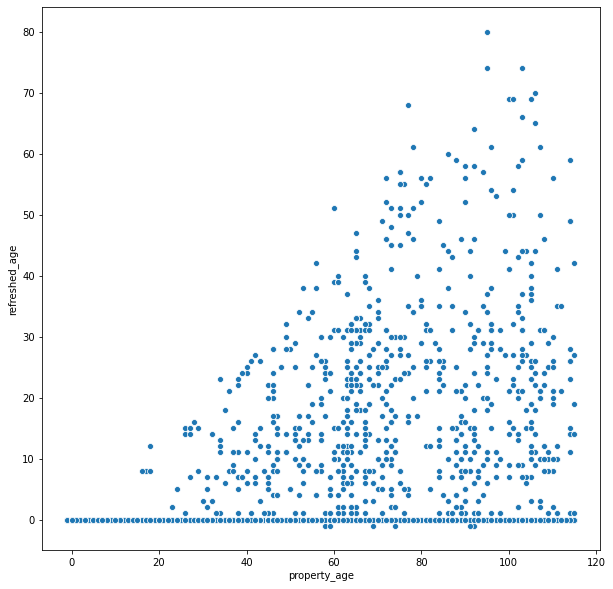

In [30]:
plt.figure(figsize=(10,10))

sb.scatterplot(x='property_age', y='refreshed_age',data=df_clean)

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19688 entries, 0 to 23152
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19688 non-null  string 
 1   price             19688 non-null  float64
 2   bedrooms          19688 non-null  int32  
 3   floors            19688 non-null  int32  
 4   waterfront        19688 non-null  int32  
 5   view              19688 non-null  int32  
 6   condition         19688 non-null  string 
 7   review_score      19688 non-null  int32  
 8   basement_size     19688 non-null  int32  
 9   built             19688 non-null  int32  
 10  renovation        19688 non-null  int32  
 11  zipcode           19688 non-null  string 
 12  latitude          19688 non-null  float64
 13  longitude         19688 non-null  float64
 14  living_room_size  19688 non-null  float64
 15  lot_size          19688 non-null  float64
 16  sale_month        19688 non-null  object

In [32]:

"""
Checking the range of date of sale, because property tends to rise in value due to various factors such as inflation,
so if the time period range is large, we might need to scale them by a factor determined by the property index

However as most of the properties were sold in 2014-2015 this is not necessary
"""

df_clean["sale_year"].value_counts()

2014    13285
2015     6403
Name: sale_year, dtype: int64

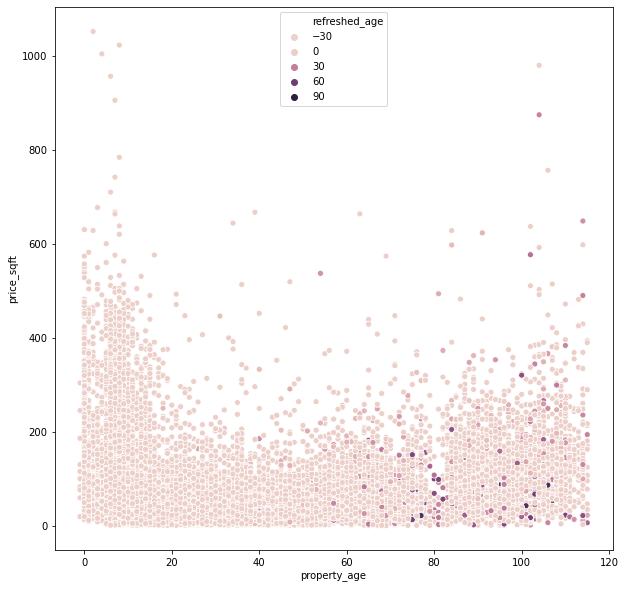

In [178]:
plt.figure(figsize=(10,10))

sb.scatterplot(x='property_age', y='price_sqft',hue="refreshed_age",data=df_clean)

In [35]:
date_list=['date']

int_list =['bedrooms', 'floors','waterfront','view','review_score', 'basement_size',"sale_year","property_age","refreshed_age"]

float_list=["price_sqft",'price','latitude', 'longitude','living_room_size','lot_size']

str_list=['id','condition','zipcode']

In [36]:
number_list=int_list+float_list
df_clean[number_list]

,bedrooms,floors,waterfront,view,review_score,basement_size,sale_year,property_age,refreshed_age,price_sqft,price,latitude,longitude,living_room_size,lot_size
0,3,1,0,0,10,0,2014,59,0,39.274336,221900.0,47.5112,-122.257,1340.0,5650.0
1,3,2,0,0,7,400,2014,63,23,70.428067,538000.0,47.7210,-122.319,1690.0,7639.0
2,2,1,0,0,8,0,2015,82,0,22.326966,180000.0,47.7379,-122.233,2720.0,8062.0
3,4,1,0,0,6,910,2014,49,0,120.800000,604000.0,47.5208,-122.393,1360.0,5000.0
4,3,1,0,0,6,0,2015,28,0,67.972811,510000.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23146,3,2,1,3,9,0,2014,24,0,18.101513,750000.0,47.4000,-122.420,2350.0,41433.0
23147,3,1,0,0,7,0,2015,53,0,29.404467,237000.0,47.3798,-122.306,1640.0,8060.0
23149,2,1,0,0,6,0,2014,10,0,94.027692,455000.0,47.7171,-122.033,1440.0,4839.0
23151,2,1,0,0,11,0,2015,66,0,20.076267,179000.0,47.4488,-122.274,1100.0,8916.0


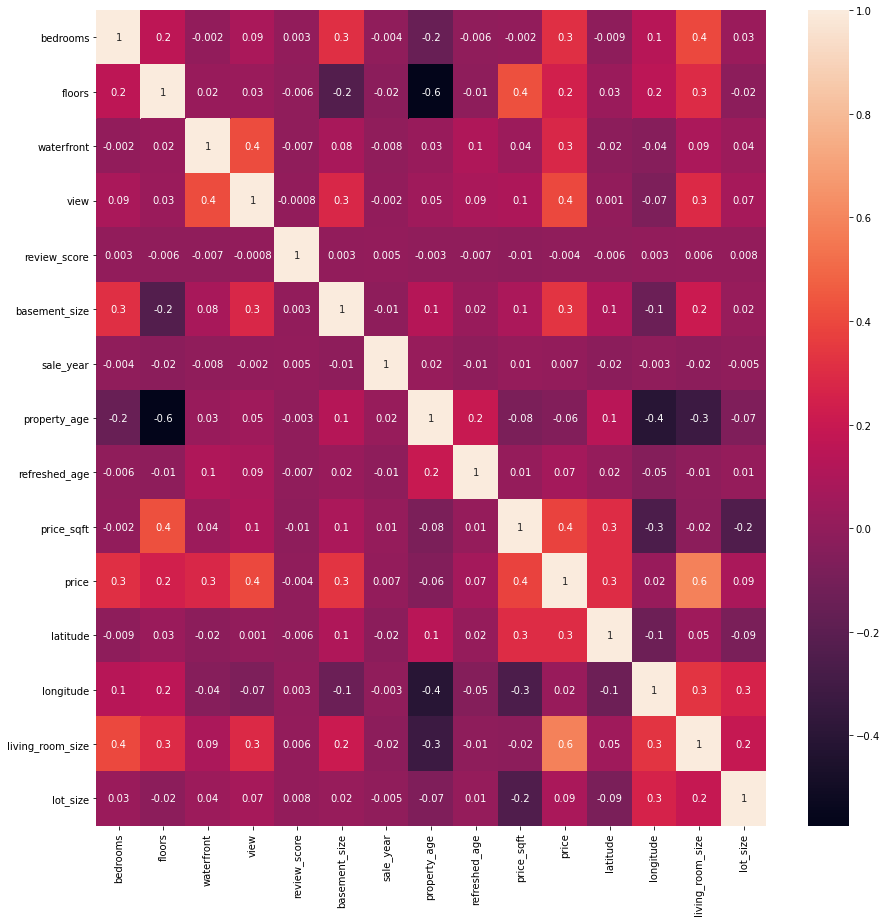

In [37]:
"""
Checking the interaction effects between variables, I use a correlation heatmap:

Observations:
1. Number of floors and the year the property age seems to have a strong correlation ratio of -0.6.
2. Living room size and price looks to have a strong correlation ratio of 0.6.

(living room size, no of bedrooms) - moderate correlation of 0.4
(price/sqm, no of floors) - moderate correlation of 0.4
(price, view) - moderate correlation of 0.4
(longtitude , year built) - moderate correlation of 0.4

"""

plt.figure(figsize=(15,15))

sb.heatmap(df_clean[number_list].corr(), annot = True,fmt='.1g')

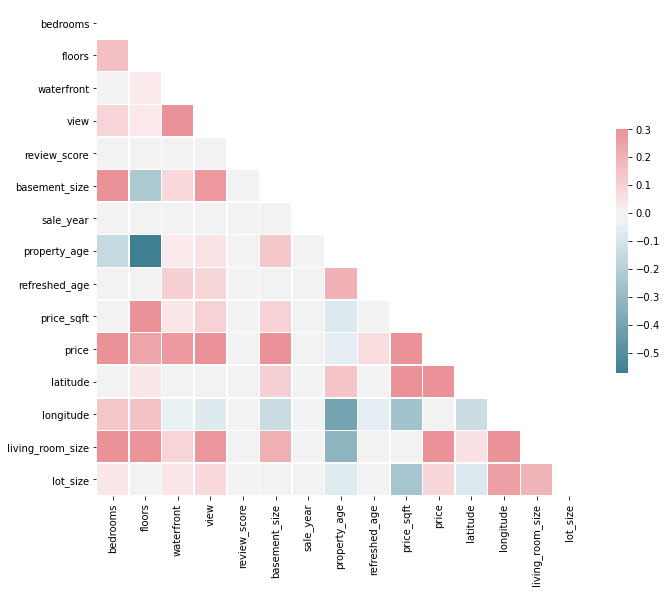

In [38]:
"""
observation on effects of independent varaibles on dependent variable.

positive: number of floors, whether it is waterfront facing, view score, and basement size appear to have a positive effect
on the dependant variable

negative: property age

"""

corr =df_clean[number_list].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
"""
Applying one hot encoding for categorical variables.

As 'condition' has a natural order , ie. excellent>good>fair>poor>terrible, we can encode it 
as an interval 1 being worst, 5 being best

"""
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df_explode = df_clean.copy(deep=True) #savepoint

lencoder = LabelEncoder()
df_explode["condition"]=df_explode["condition"].map({"terrible":1,"poor":2,"fair":3,"good":4,"excellent":5})

print(df_explode["condition"].value_counts())

dum_df=df_explode.set_index("id")

3    12786
4     5181
5     1536
2      154
1       31
Name: condition, dtype: int64


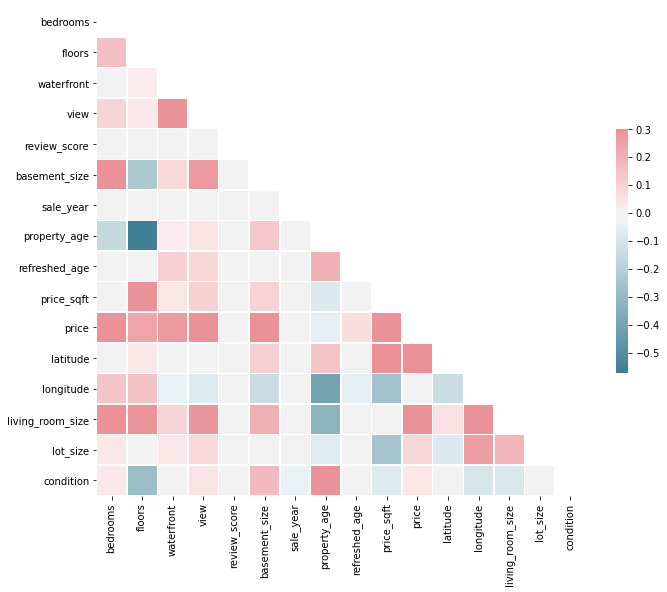

In [53]:
dum_df_corr=dum_df[list(number_list+['condition'])]


corr2 =dum_df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

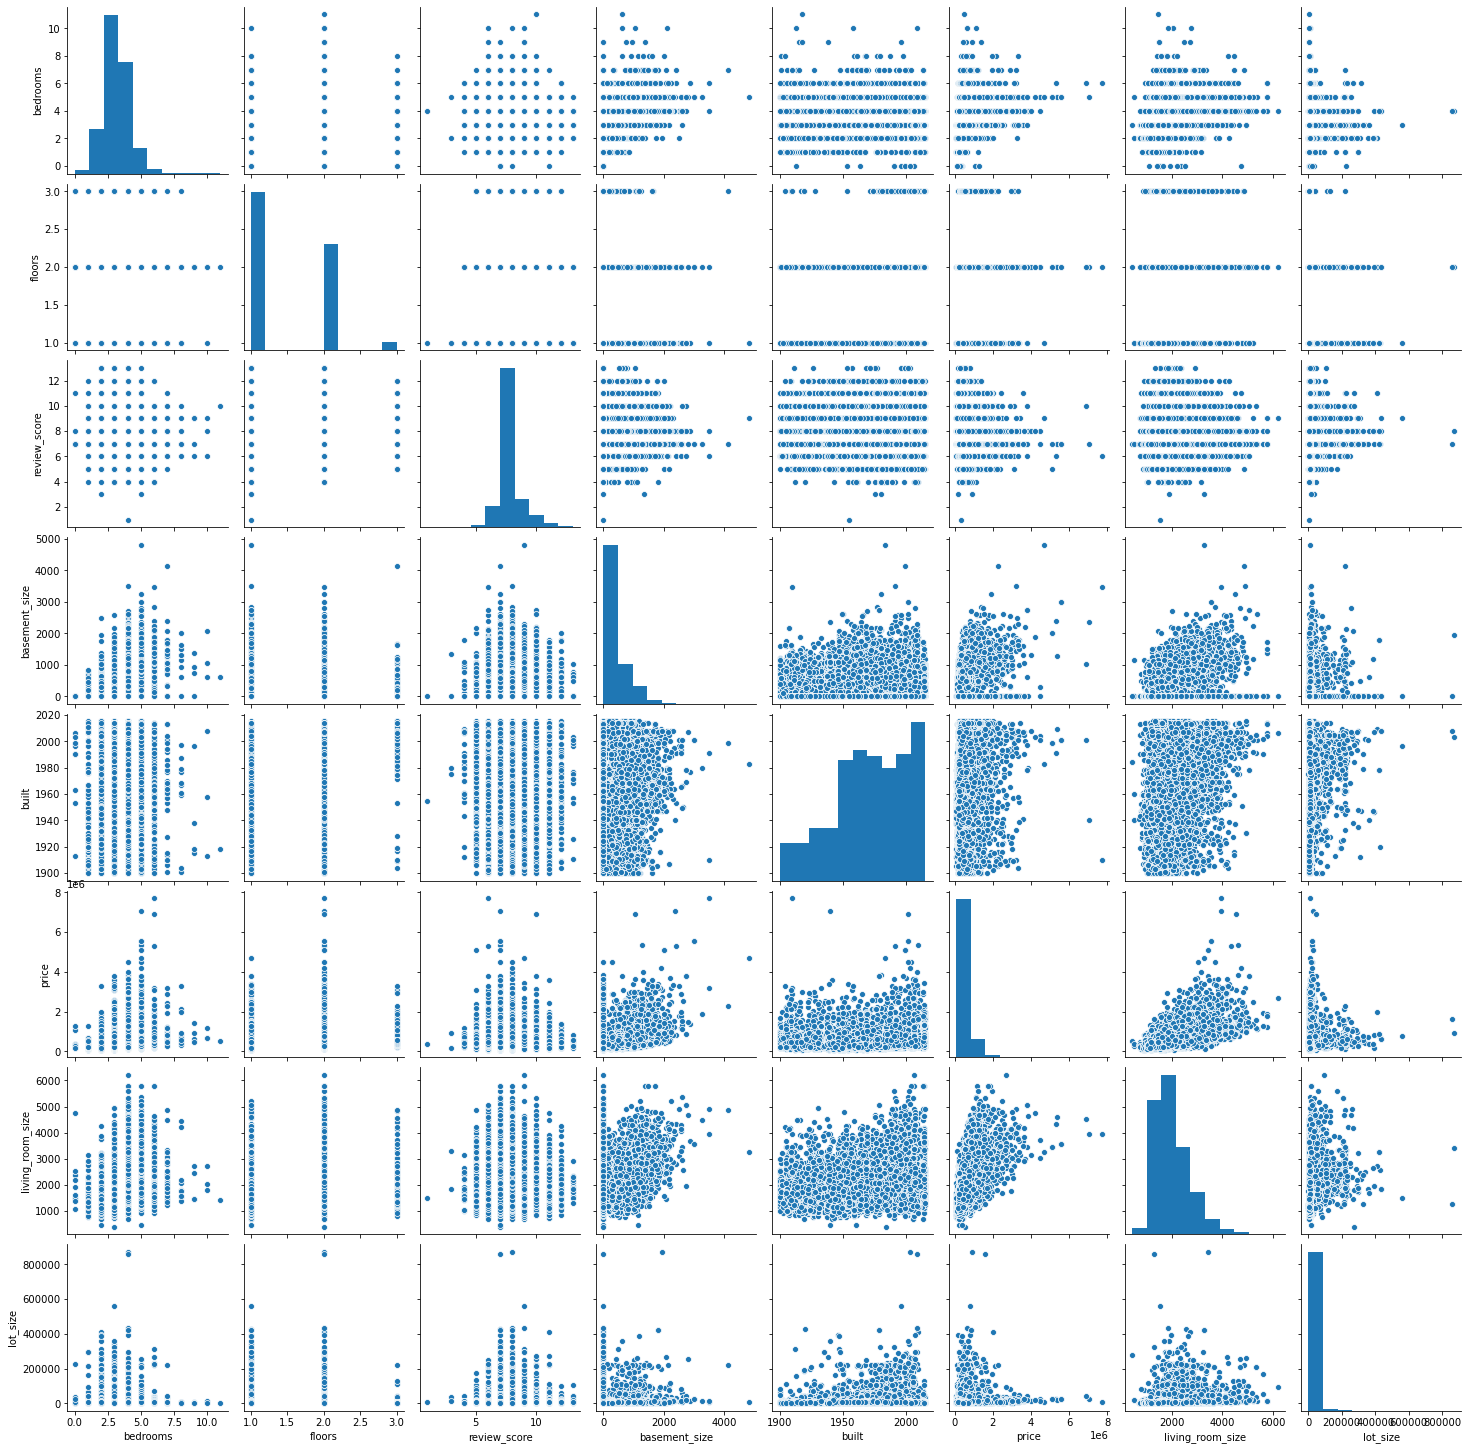

In [58]:
import seaborn as sb

"""
Plotting scatter plots from across pairs of variables, it is observed that:

1. The largest variation in price/sqft occurs for smaller lot sizes, above which, the price/sqft is likely 
approximately constant.

2. Living room size, basement size seems to have a positive correlation with prices.


"""

sb.pairplot(dum_df[['bedrooms', 'floors','review_score', 'basement_size','built','price','living_room_size','lot_size']])

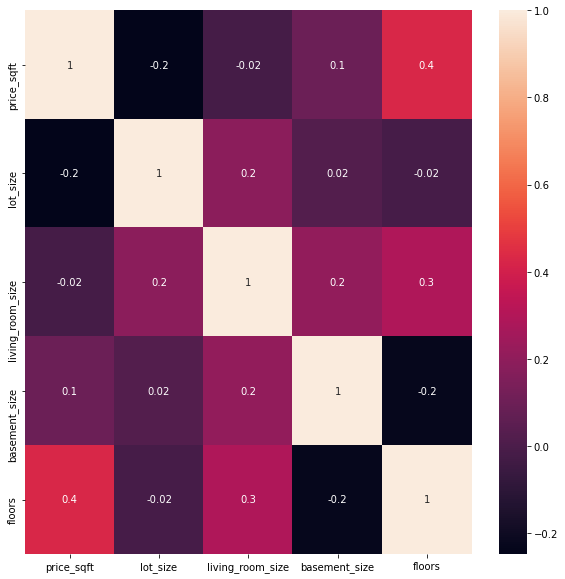

In [254]:
import seaborn as sb

"""
Checking for correlation between variables would lead to coefficient for the models having higher variances.

"""
plt.figure(figsize=(10,10))

sb.heatmap(df_explode[["price_sqft",'lot_size', 'living_room_size',"basement_size","floors"]].corr(), annot = True,fmt='.1g')

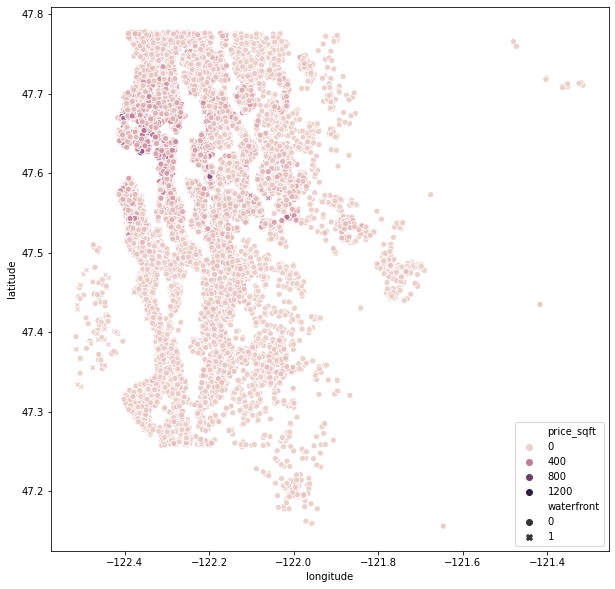

In [34]:
"""
plotting the latitude on y-axis, longtitude on x-axis, and price per sqft as color, we see that the more valuable houses
tend to be concentrated between 47.5 to 47.7 (latitude), and -122.4 to -122.0 (longtitude). I would guess that that area is 
downtown for the location.

"""

plt.figure(figsize=(10,10))

sb.scatterplot(x='longitude', y='latitude',hue="price_sqft",style="waterfront",data=df_clean)

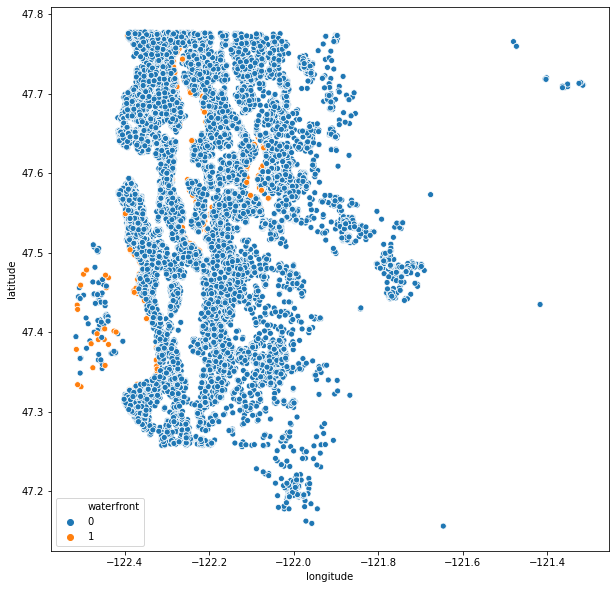

In [35]:
"""
Coloring by the waterfront feature, gives an indication that between 47.3 to 47.5 (latitude), is a small island off the coast
It also looks possible that survey participants did not indicate that they were facing the waterfront when indeed they were.
"""

plt.figure(figsize=(10,10))

sb.scatterplot(x='longitude', y='latitude',hue="waterfront",data=df_clean)

In [59]:
for col in ['price',]:
    dum_df_corr.pop(col)

In [60]:
dum_df_corr=dum_df_corr.set_index(dum_df.index)

In [61]:
dum_df_corr.head()

,bedrooms,floors,waterfront,view,review_score,basement_size,sale_year,property_age,refreshed_age,price_sqft,latitude,longitude,living_room_size,lot_size,condition
id,,,,,,,,,,,,,,,
7787980.0,3,1,0,0,10,0,2014,59,0,39.274336,47.5112,-122.257,1340.0,5650.0,3
6774848.0,3,2,0,0,7,400,2014,63,23,70.428067,47.7210,-122.319,1690.0,7639.0,3
6999329.0,2,1,0,0,8,0,2015,82,0,22.326966,47.7379,-122.233,2720.0,8062.0,3
7773052.0,4,1,0,0,6,910,2014,49,0,120.800000,47.5208,-122.393,1360.0,5000.0,5
7760818.0,3,1,0,0,6,0,2015,28,0,67.972811,47.6168,-122.045,1800.0,7503.0,3


In [62]:
y=dum_df_corr.pop("price_sqft")

In [63]:
X=dum_df_corr

In [64]:
from sklearn.preprocessing import StandardScaler

"""
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

"""


scaler = StandardScaler()
X_transformed=scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_transformed, y, test_size=0.7)

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_valid, y_valid)))

R^2 Training Score: 0.98 
OOB Score: 0.87 
R^2 Validation Score: 0.89


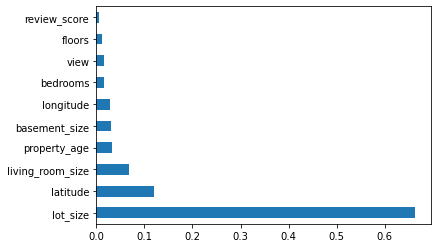

In [67]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [68]:
import eli5
from eli5.sklearn import PermutationImportance
"""
Using PermutationImportance to permutate the various features to get a sense of important features.

The first number in each row shows the reduction
in model performance by the reshuffle of that feature.

The second number is a measure of the randomness of the performance reduction
for different reshuffles of the feature column.

"""
perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)

eli5.show_weights(perm, feature_names = X.columns.tolist())

C:\Users\Jasper190\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Jasper190\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
1.9479 ± 0.0936,lot_size
0.3741 ± 0.0451,living_room_size
0.2699 ± 0.0155,latitude
0.0658 ± 0.0093,basement_size
0.0469 ± 0.0031,longitude
0.0395 ± 0.0025,property_age
0.0246 ± 0.0038,bedrooms
0.0229 ± 0.0033,view
0.0194 ± 0.0023,floors
0.0033 ± 0.0004,review_score


# Repeating analysis with price instead of price_sqft

In [191]:
price_df=dum_df[list(number_list+["condition"])].copy(deep=True)

In [194]:
del(price_df["price_sqft"])

In [197]:
prepare_params(price_df,"price", test_size=0.4, scale=True, target_var_type = "cont")

R^2 Training Score: 0.97 
OOB Score: 0.79 
R^2 Validation Score: 0.81


KeyboardInterrupt: 

In [229]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

def scale_params(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

def prepare_params(df,target_var, test_size=0.4, scale=False, target_var_type = "cont"):
    
    temp_df=df.copy(deep=True)
    
    y_px=temp_df.pop(target_var)
    X_px=temp_df
    
    if(scale):
        X_transformed_px=scale_params(X_px)
    else:
        X_transformed_px=X_px
    

    X_train_px, X_valid_px, y_train_px, y_valid_px = train_test_split(X_transformed_px, y_px, test_size=test_size)
    
    if(target_var_type=="disc"):
        model=RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,)
    elif(target_var_type=="cont"):
            model=RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           )
            
    
    rf_px = model
    rf_px.fit(X_train_px, y_train_px)

    print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf_px.score(X_train_px, y_train_px), 
                                                                                                 rf_px.oob_score_,
                                                                                                 rf_px.score(X_valid_px, y_valid_px)))

    perm_px = PermutationImportance(rf_px, cv = None, refit = False, n_iter = 50).fit(X_train_px, y_train_px)

    eli5.show_weights(perm_px, feature_names = X_train_px.columns.tolist())
    
    sel = SelectFromModel(perm_px, threshold=0.005, prefit=True)
    X_trans_px = sel.transform(X_train_px)
    X_valid_px = sel.transform(X_valid_px)

    return X_trans_px, X_valid_px, y_train_px, y_valid_px


In [71]:
del(price_df["price_sqft"])

In [72]:
y_px=price_df.pop("price")

X_px=price_df


from sklearn.preprocessing import StandardScaler

"""
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

"""


scaler = StandardScaler()
X_transformed_px=scaler.fit_transform(X_px)

from sklearn.model_selection import train_test_split
X_train_px, X_valid_px, y_train_px, y_valid_px = train_test_split(X_transformed_px, y_px, test_size=0.4)

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_px = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf_px.fit(X_train_px, y_train_px)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf_px.score(X_train_px, y_train_px), 
                                                                                             rf_px.oob_score_,
                                                                                             rf_px.score(X_valid_px, y_valid_px)))

R^2 Training Score: 0.97 
OOB Score: 0.79 
R^2 Validation Score: 0.80


In [74]:
import eli5
from eli5.sklearn import PermutationImportance
"""
Using PermutationImportance to permutate the various features to get a sense of important features.

Idea [from ELi5 documentation]: feature importance can be measured by looking at how much the score 
(accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available.

The first number in each row shows the reduction
in model performance by the reshuffle of that feature.

The second number is a measure of the randomness of the performance reduction
for different reshuffles of the feature column.

"""
perm_px = PermutationImportance(rf_px, cv = None, refit = False, n_iter = 50).fit(X_train_px, y_train_px)

eli5.show_weights(perm_px, feature_names = X_px.columns.tolist())

Weight,Feature
0.6800 ± 0.0332,living_room_size
0.5315 ± 0.0173,latitude
0.4821 ± 0.0364,longitude
0.1061 ± 0.0097,property_age
0.1030 ± 0.0099,lot_size
0.0567 ± 0.0030,basement_size
0.0482 ± 0.0024,bedrooms
0.0449 ± 0.0052,floors
0.0362 ± 0.0041,waterfront
0.0270 ± 0.0011,view


In [94]:
from sklearn.feature_selection import SelectFromModel

"""
Selecting the top 12 features from PermutationImportance

"""

sel = SelectFromModel(perm_px, threshold=0.005, prefit=True)
X_trans_px = sel.transform(X_px)

X_trans_px

array([[3.000e+00, 1.000e+00, 0.000e+00, ..., 1.340e+03, 5.650e+03,
        3.000e+00],
       [3.000e+00, 2.000e+00, 0.000e+00, ..., 1.690e+03, 7.639e+03,
        3.000e+00],
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 2.720e+03, 8.062e+03,
        3.000e+00],
       ...,
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 1.440e+03, 4.839e+03,
        3.000e+00],
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 1.100e+03, 8.916e+03,
        3.000e+00],
       [3.000e+00, 1.000e+00, 0.000e+00, ..., 1.140e+03, 3.960e+03,
        4.000e+00]])

Text(0, 0.5, 'Cumulative explained variance')

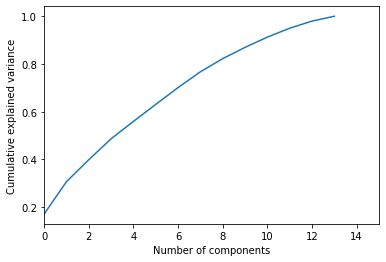

In [75]:
from sklearn.decomposition import PCA

"""
PCA allows us to reduce the dimensonality of the dataset to its principle eigenvectors.

Principal component analysis (PCA) is a mathematical algorithm that 
reduces the dimensionality of the data while retaining most of the variation in the data set

To get a sense of a good number of variables to use for the model, 
this would mean that the first 12 components are likely to be sufficient for the model to span the dataset space.

"""

pca = PCA().fit(X_transformed_px)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,15,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [221]:
from sklearn import model_selection

#Regression
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


"""
In terms of choosing a regression model, one factor to consider is we want to fit a global function, like a linear
regression, or fit a model with more localized decision boundaries, eg a random forest model. 

A linear regression model would allow for simpler global trend explainations, whereas for tree based models like random 
forest which utilizes bagging.

An alternative tree method that could have been considered would be boosting, where each weak learner learns from the
previous iteration. But would be harder to tune correctly.

In terms of random forest cons, the model is prone to overfitting, which may lead to problems when generalizing future
test datasets.

In terms of measuring, I chose 2 metrics, explained_variance, and R2 (or goodness of fit), taking the average of scores
that were determined by K-folds, where K-1 folds formed the training set and 1 fold formed the test set to help keep the
random picking process.

explained_variance - this metric tells me an estimate of how much of the variation in the dataset is currently explained/
accounted for.

R2 - This is a goodness of fit metric that indicates the percentage of the variance in 
the dependent variable that the independent variables explain collectively.


"""



models_reg=[('Ridge',linear_model.Ridge(alpha=.5)),
        ('OLS',linear_model.LinearRegression()),
        ('RandomForestRegressor',RandomForestRegressor())]

models_class = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GaussianNB', GaussianNB())]


def build_model(x,y,model_list,scoring_param="explained_variance"):
    outcome = []
    model_names = []
    model_dict={}

    for model_name, model in models:
        k_fold_validation = model_selection.KFold(n_splits=10)
        results = model_selection.cross_val_score(model, X_trans_px, y_px, cv=k_fold_validation, scoring=scoring_param)
        outcome.append(results)
        model_names.append(model_name)
        output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
        print(output_message)
        model_dict[model_name]=model

    fig = plt.figure(figsize=(20,20))


    fig.suptitle('Comparison by '+scoring_param )
    ax = fig.add_subplot(111)
    plt.boxplot(outcome)
    ax.set_xticklabels(model_names)
    plt.show()
    
    return model_dict

In [95]:
X_px.head()

,bedrooms,floors,waterfront,view,review_score,basement_size,sale_year,property_age,refreshed_age,latitude,longitude,living_room_size,lot_size,condition
id,,,,,,,,,,,,,,
7787980.0,3,1,0,0,10,0,2014,59,0,47.5112,-122.257,1340.0,5650.0,3
6774848.0,3,2,0,0,7,400,2014,63,23,47.7210,-122.319,1690.0,7639.0,3
6999329.0,2,1,0,0,8,0,2015,82,0,47.7379,-122.233,2720.0,8062.0,3
7773052.0,4,1,0,0,6,910,2014,49,0,47.5208,-122.393,1360.0,5000.0,5
7760818.0,3,1,0,0,6,0,2015,28,0,47.6168,-122.045,1800.0,7503.0,3


Ridge| Mean=0.553525 STD=0.039608
OLS| Mean=0.553516 STD=0.039594
RandomForestRegressor| Mean=0.811314 STD=0.036171


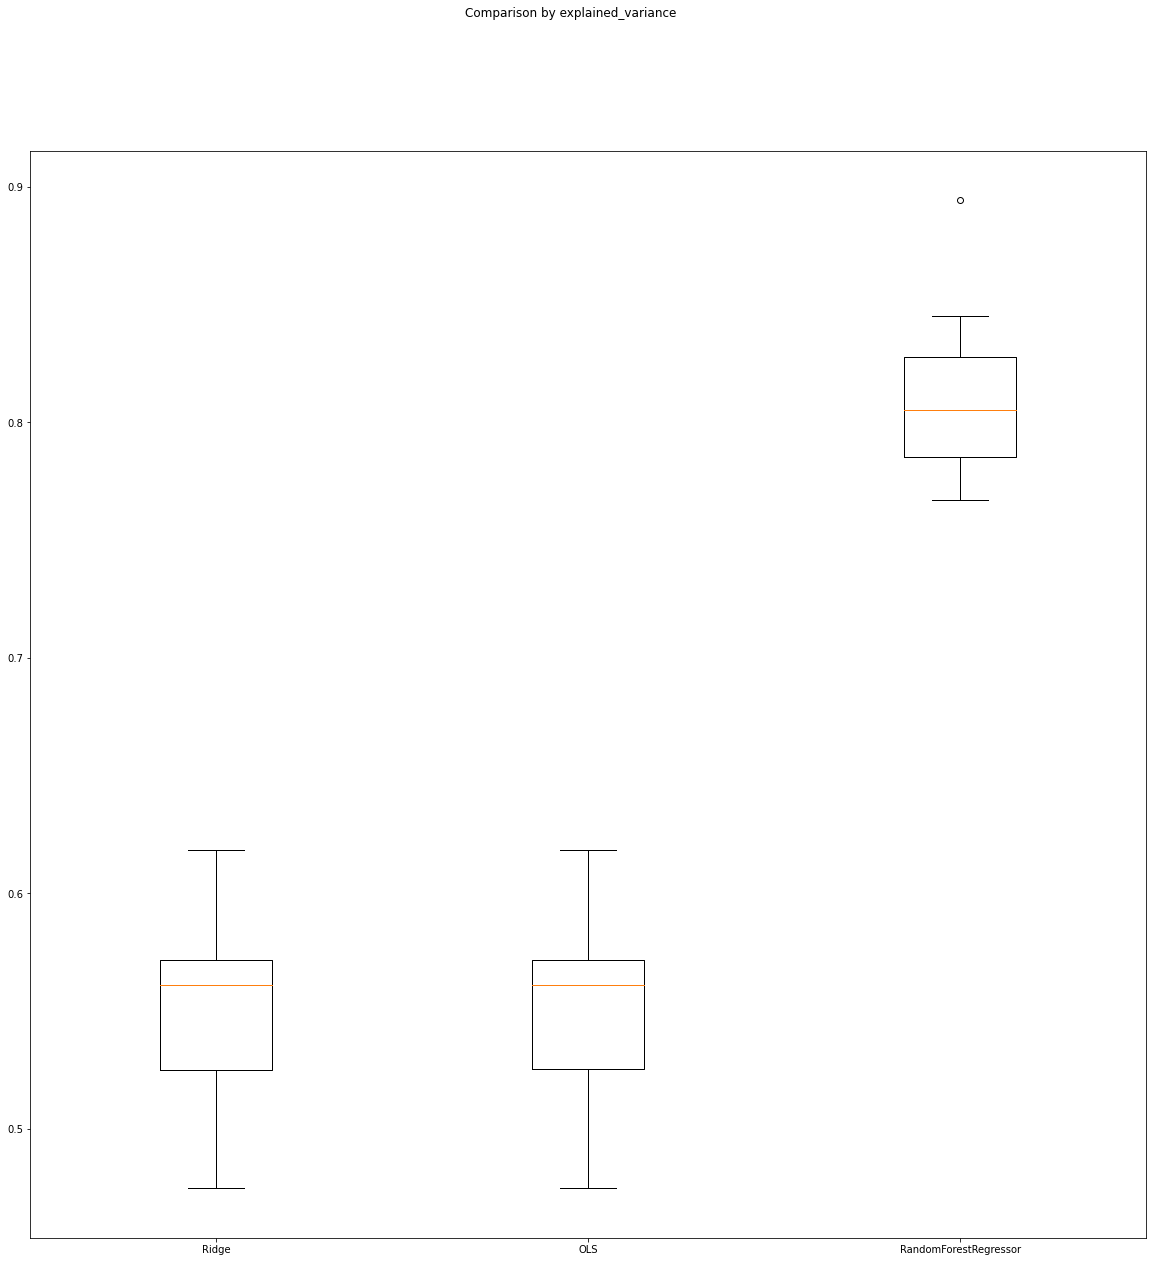

In [102]:
build_model(X_trans_px,y_px,models_reg,scoring_param="explained_variance")

# Explained Variance

In terms of explained variance, the random forest regressor appears to perform the best to explain the variations in the data.

Ridge| Mean=0.552568 STD=0.040473
OLS| Mean=0.552560 STD=0.040458
RandomForestRegressor| Mean=0.811197 STD=0.036427


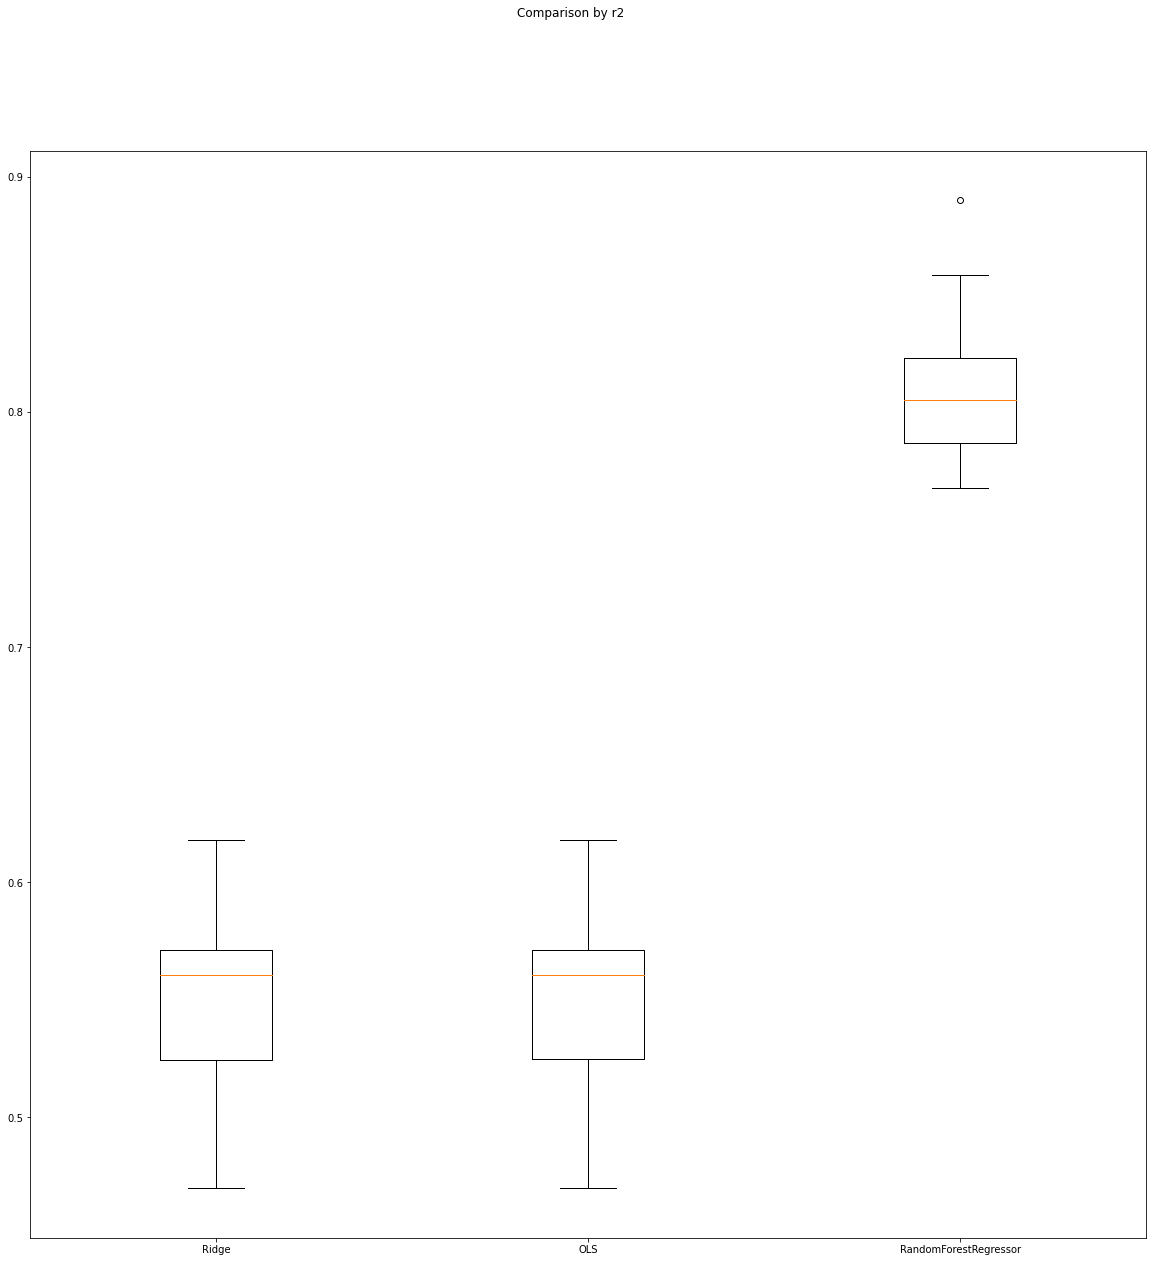

In [103]:
build_model(X_trans_px,y_px,models_reg,scoring_param="r2")

# R^2 goodness of fit



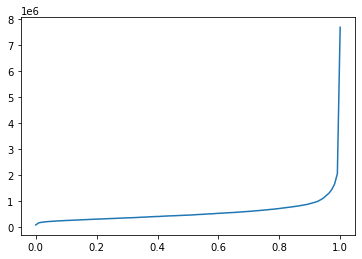

In [133]:
"""
y_px=price_df.pop("price")

X_px=price_df

"""

y_px.quantile([i for i in np.linspace(0,1,110)]).plot()

In [147]:
y_px.max()

7700000.0

In [121]:
price_df_cat=dum_df[list(number_list+["condition"])].copy(deep=True)

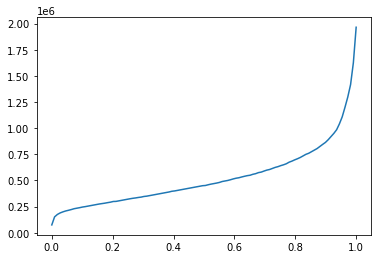

In [134]:
removed_outlier_df=price_df_cat[price_df_cat["price"]<=price_df_cat["price"].quantile(0.99)]

removed_outlier_df["price"].quantile([i for i in np.linspace(0,1,110)]).plot()

In [146]:
"""
Break into segments of 200k to have a sense of the price, because the first 200k would roughly capture up to approximately
the first decile. and the max value after removal of the 99th percentile and above is slighltly less than 2 mil. That would 
give 10 segments. So that the output estimate is more meaningful as compared to using the percentiles where between the
20th and 80th percentile the jumps are not very significant.

Add 11th group as those above 2mil to keep the information in the model. ( Max value is 7.7mil)

"""

removed_outlier_df["price"].quantile([i for i in np.linspace(0,1,11)])

0.0      75000.0
0.1     245000.0
0.2     297000.0
0.3     345000.0
0.4     399950.0
0.5     450000.0
0.6     517500.0
0.7     590000.0
0.8     699950.0
0.9     865000.0
1.0    1965220.0
Name: price, dtype: float64

In [168]:
price_df_cat=dum_df[list(number_list+["condition"])].copy(deep=True)

price_df_cat["price_bin"]=pd.cut(price_df_cat["price"],bins=list([i for i in range(0,2200000,200000)]+[7700000]) )

In [170]:
price_df_cat["price_bin"].value_counts()

(200000, 400000]      7197
(400000, 600000]      5952
(600000, 800000]      3047
(800000, 1000000]     1385
(0, 200000]            753
(1000000, 1200000]     447
(1200000, 1400000]     345
(2000000, 7700000]     184
(1400000, 1600000]     174
(1600000, 1800000]     122
(1800000, 2000000]      82
Name: price_bin, dtype: Int64

In [171]:
temp_df_class=price_df_cat.copy(deep=True)

del(temp_df_class["price"])

In [169]:
price_df_cat["price_bin"]=price_df_cat["price_bin"].astype("string")

In [230]:
X_trans_bin, X_valid_bin, y_train_bin, y_valid_bin = prepare_params(price_df_cat,"price_bin", test_size=0.4, scale=False, target_var_type="disc")

R^2 Training Score: 1.00 
OOB Score: 0.99 
R^2 Validation Score: 0.99


In [223]:
models_class

[('LogReg', LogisticRegression()),
 ('SVM', SVC()),
 ('DecTree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('GaussianNB', GaussianNB())]

In [255]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB(alpha=0.5)

mnb.fit(X_trans_bin,y_train_bin)

MultinomialNB(alpha=0.5)

In [260]:
def calculate_accuracy(model):    
    accuracy_matrix=np.where(y_valid_bin==model.predict(X_valid_bin),1,0 )
    return accuracy_matrix.sum()/len(accuracy_matrix)

In [259]:
for model_name,model in models_class:
    temp_model=model.fit(X_trans_bin,y_train_bin)
    print(model_name," : ",calculate_accuracy(temp_model) )

C:\Users\Jasper190\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogReg  :  0.5040629761300153
SVM  :  0.9846368715083799
DecTree  :  1.0
KNN  :  0.9991112239715592
GaussianNB  :  0.9385474860335196


In [257]:
log=LogisticRegression()
log.fit(X_trans_bin,y_train_bin)

C:\Users\Jasper190\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [248]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_valid_bin# ground truth labels
y_probas = mnb.fit(X_trans_bin)# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [243]:
from sklearn.metrics import roc_auc_score

roc_auc_score(np.array(y_valid_bin).astype(str),mnb.predict(X_valid_bin).astype(str),multi_class="ovr")

C:\Users\Jasper190\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


TypeError: cannot perform reduce with flexible type

In [240]:
mnb.predict(X_valid_bin)

array(['(200000, 400000]', '(800000, 1000000]', '(200000, 400000]', ...,
       '(400000, 600000]', '(600000, 800000]', '(1600000, 1800000]'],
      dtype='<U18')

In [222]:
from sklearn.metrics import roc_auc_score

model_dict_class=build_model(X_trans_bin,y_train_bin,models_class[3],scoring_param=roc_auc_score(multi_class="ovo") )

TypeError: roc_auc_score() missing 2 required positional arguments: 'y_true' and 'y_score'

In [220]:
y_train_bin.value_counts()

(200000, 400000]      4317
(400000, 600000]      3582
(600000, 800000]      1808
(800000, 1000000]      811
(0, 200000]            479
(1000000, 1200000]     258
(1200000, 1400000]     213
(2000000, 7700000]     113
(1400000, 1600000]     107
(1600000, 1800000]      79
(1800000, 2000000]      45
Name: price_bin, dtype: Int64

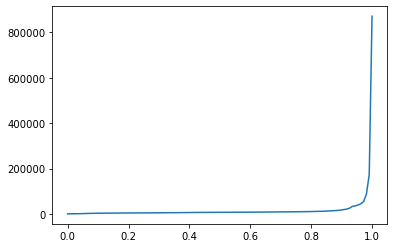

In [135]:
price_df_cat["lot_size"].quantile([i for i in np.linspace(0,1,110)]).plot()

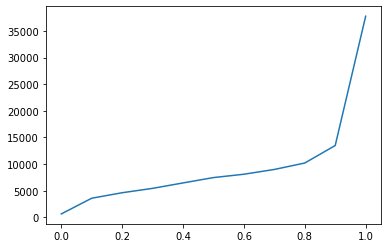

In [142]:
price_df_cat.loc[price_df_cat["lot_size"]<=price_df_cat["lot_size"].quantile(0.95),"lot_size"].quantile([i for i in np.linspace(0,1,11)]).plot()

In [289]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results = model_selection.cross_val_score(model, X_px, y_px, cv=k_fold_validation, scoring='r2')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

Ridge| Mean=0.553801 STD=0.040854
OLS| Mean=0.553792 STD=0.040852
SGD| Mean=-14541705796584407178412032.000000 STD=40897021090171159285071872.000000
RandomForestRegressor| Mean=0.814739 STD=0.035196
